In [1]:
pip install efficientnet_pytorch

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 33.7 MB/s eta 0:00:00
  Created wheel for efficientnet_pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16426 sha256=36f24744de1b9147f0dfd75d938ea7d811be3f76b21583b4d

In [2]:
import gdown
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import numpy as np
from glob import glob
import glob
import torch
import torch.nn as nn
from torchsummary import summary
import torchvision
from torchvision import datasets, transforms as T
from torchvision.transforms import InterpolationMode
from efficientnet_pytorch import EfficientNet
import os
import torch.optim as optim
from PIL import ImageFile
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from torch.utils.data.dataset import random_split
from torch.utils.data.dataset import Dataset
import cv2
from torch.utils.data import DataLoader
import copy
import time
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from torch.optim import lr_scheduler
import shutil

In [ ]:
# https://drive.google.com/file/d/1Yr9CPoMb_2bOBNFbJ-GpQIxDG-ggoH0J/view?usp=sharing

In [5]:
data = '/content/data'

In [3]:
#importing data
#Dataset address
url = 'https://drive.google.com/uc?export=download&id=1Yr9CPoMb_2bOBNFbJ-GpQIxDG-ggoH0J'


output = 'kidney_stone.zip'
gdown.download(url,output ,quiet = False)

# giving zip file
data_dir = './kidney_stone.zip'
# extracting file
with zipfile.ZipFile(data_dir, 'r') as zf:
  zf.extractall('./data/')

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1Yr9CPoMb_2bOBNFbJ-GpQIxDG-ggoH0J
From (redirected): https://drive.google.com/uc?export=download&id=1Yr9CPoMb_2bOBNFbJ-GpQIxDG-ggoH0J&confirm=t&uuid=aa053aa4-62ca-44cb-b11d-3c1158799002
To: /content/kidney_stone.zip
100%|██████████| 225M/225M [00:03<00:00, 59.0MB/s]


In [6]:
class_names = os.listdir(data)
class_names

['Normal', 'stone']

In [7]:
file_paths=[]
labels=[]

#data_kidney='/content/data_kidney'

for subfolder in class_names:

  folder_path = os.path.join(data,subfolder)
  for filename in os.listdir(folder_path):
    file_paths.append(os.path.join(folder_path, filename))
    labels.append(subfolder)


In [26]:
import pandas as pd

In [32]:
df = pd.DataFrame({'file_path': file_paths, "label":labels})

In [35]:
df.head(10)

,file_path,label
0,/content/data/Normal/Normal_604.JPG,Normal
1,/content/data/Normal/Normal_2691.JPG,Normal
2,/content/data/Normal/Normal_440.JPG,Normal
3,/content/data/Normal/Normal_1085.JPG,Normal
4,/content/data/Normal/Normal_2895.JPG,Normal
5,/content/data/Normal/Normal_2063.JPG,Normal
6,/content/data/Normal/Normal_3891.JPG,Normal
7,/content/data/Normal/Normal_3089.JPG,Normal
8,/content/data/Normal/Normal_3499.JPG,Normal
9,/content/data/Normal/Normal_1324.JPG,Normal


In [34]:
df.tail(10)

,file_path,label
9406,/content/data/stone/Stone_3442.JPG,stone
9407,/content/data/stone/Stone_249.JPG,stone
9408,/content/data/stone/Stone_3568.JPG,stone
9409,/content/data/stone/Stone_4668.JPG,stone
9410,/content/data/stone/Stone_3871.JPG,stone
9411,/content/data/stone/Stone_4400.JPG,stone
9412,/content/data/stone/Stone_623.JPG,stone
9413,/content/data/stone/Stone_51.JPG,stone
9414,/content/data/stone/Stone_2147.JPG,stone
9415,/content/data/stone/Stone_3188.JPG,stone


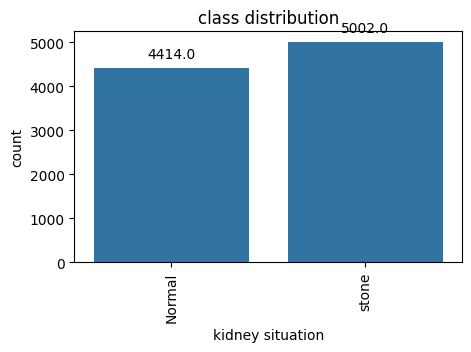

In [114]:
plt.figure(figsize=(5,3))

colors =sns.color_palette("Set2", len(labels))

ax = sns.countplot(x='label', data = df)

plt.title('class distribution')
plt.xlabel('kidney situation')
plt.ylabel('count')
plt.xticks(rotation= 90)


for p in ax.patches:

  ax.annotate(f'{p.get_height()}', (p.get_x()+p.get_width() / 2, p.get_height()),
              ha = 'center', va = 'center', xytext=(0,10),
              textcoords='offset points')

plt.show()


In [115]:
labels_count = df['label'].value_counts()
label_unique = df['label'].unique()

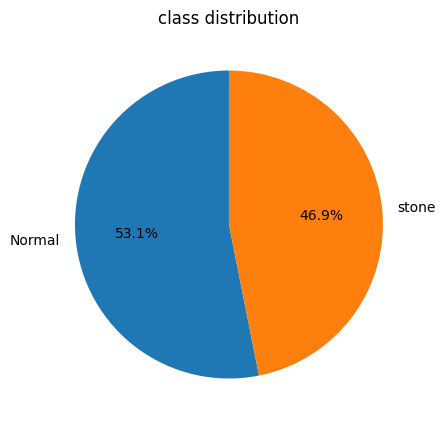

In [116]:
plt.figure(figsize = (5,5))

colors =sns.color_palette("BuGn_r", len(labels))

plt.pie(labels_count, labels=label_unique, autopct='%1.1f%%', startangle=90 )
plt.title('class distribution')
plt.show()

In [68]:
use_cuda = torch.cuda.is_available()

In [8]:
!pip install split-folders


In [9]:
import splitfolders

# Input and output directory
input_folder = data  # e.g., "./kidney_data"
output_folder = '/content/data_kidney'   # e.g., "./kidney_split"

splitfolders.ratio(
    input=input_folder,
    output=output_folder,
    seed=42,
    ratio=(.7, .15, .15),  # train, val, test
    move=True  # move files instead of copy to save space
)


Copying files: 9416 files [00:00, 17833.19 files/s]


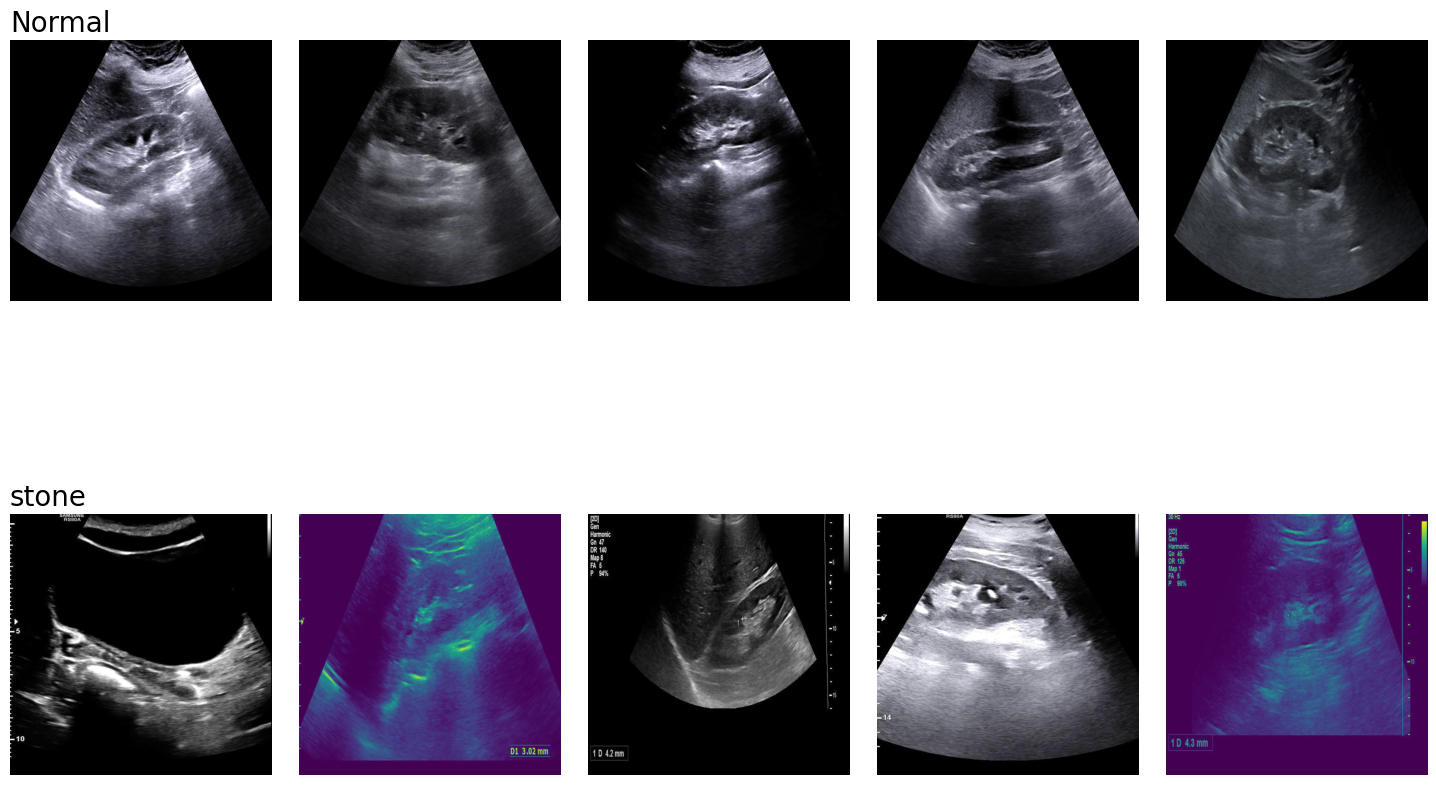

In [86]:
import random
from PIL import Image


num_images = 5

fig, axes =plt.subplots(2, num_images, figsize = (15,12))

for i , label in enumerate (label_unique) :

  categ_images = df[df['label']== label]['file_path'].tolist()
  selected_images = random.sample(categ_images, num_images)

  for j, img_path in enumerate(selected_images):

    img = Image.open(img_path)
    axes[i,j].imshow(img)

    axes[i,j].axis('off')

    if j == 0:

      axes[i,j].set_title(label, fontsize = 20, loc ='left')

plt.tight_layout(pad= 3.0, w_pad = 2.0, h_pad = 5.0)
plt.subplots_adjust(top= 0.92)
plt.show()




# **Data Augmentation**

In [ ]:
img_transforms={
    'train': T.Compose([
                        T.Resize(224),
                        #T.RandomResizedCrop(224),
                        T.RandomHorizontalFlip(),
                        T.RandomRotation(degrees=10),
                        #T.ColorJitter(brightness=0.2, contrast=0.2),
                        T.ToTensor(),
                        T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
                        ]),
    'validation': T.Compose([T.Resize(size=(224, 224)),
                        T.ToTensor(),
                        T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
                        ]),
    'test': T.Compose([T.Resize(size=(224, 224)),
                        T.ToTensor(),
                        T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
                        ]),
}

In [70]:

batch_size = 32


data_kidney_path  = "/content/data_kidney"

train_path = os.path.join(data_kidney_path,'train')
test_path = os.path.join(data_kidney_path,'test')
valid = os.path.join(data_kidney_path,'val')

train_file = datasets.ImageFolder(train_path,transform= img_transforms['train'])
test_file = datasets.ImageFolder(test_path,transform= img_transforms['test'])
valid_file = datasets.ImageFolder(test_path,transform= img_transforms['validation'])



loaders_transfer={
    'train': torch.utils.data.DataLoader(train_file,batch_size,shuffle= True),
    'validation': torch.utils.data.DataLoader(valid_file, batch_size,shuffle= True),
    'test': torch.utils.data.DataLoader(test_file,batch_size,shuffle= True)

}



dataset_size = {'train': len(train_file), 'validation': len(valid_file), 'test': len(test_file)}



# **EfficientNetB0**

In [73]:
model_transfer = EfficientNet.from_pretrained('efficientnet-b0')

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth

  0%|          | 0.00/20.4M [00:00<?, ?B/s]
 50%|████▉     | 10.1M/20.4M [00:00<00:00, 13.8MB/s]
100%|██████████| 20.4M/20.4M [00:01<00:00, 20.4MB/s]

Loaded pretrained weights for efficientnet-b0


# **Changing the last layers as a classification**

In [74]:
# freez weights

for param in model_transfer.parameters():
  param.requires_grad= False

# the number if in_feature
in_features = model_transfer._fc.in_features     ## the number of input layers for our classifier(fc)

# replace FC layer or classifier
model_transfer._fc = nn.Sequential(
    nn.BatchNorm1d(num_features= in_features),
    nn.Linear(in_features, 512),
    nn.ReLU(),
    nn.BatchNorm1d(512),
    nn.Linear(512,128),
    nn.ReLU(),
    nn.BatchNorm1d(128),
    nn.Dropout(0.4),
    nn.Linear(128,2)
)

if use_cuda:
  model_transfer= model_transfer.cuda()


# **Loss and Optimization**

In [75]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.Adam(model_transfer.parameters(), lr = 0.0005)

# **Train and Validation Phases**

In [76]:
def train_model(model, criterion, optimizer, num_epochs):

    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('*' * 10)

        ########################### train & validation ###############################


        for phase in ['train', 'validation']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0


            for image, label in loaders_transfer[phase]:
                image , label = image.cuda(), label.cuda()
                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(image)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, label)


                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * image.size(0)
                running_corrects += torch.sum(preds == label.data)

            epoch_loss = running_loss / dataset_size[phase]
            epoch_acc = running_corrects.double() / dataset_size[phase]

            print(f' {phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'validation' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best validation Acc: {best_acc:4f}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [77]:
model_ft = train_model(model_transfer, criterion_transfer, optimizer_transfer, num_epochs=10)

Epoch 0/9
**********
 train Loss: 0.1253 Acc: 0.9502
 validation Loss: 0.1888 Acc: 0.9180

Epoch 1/9
**********
 train Loss: 0.0738 Acc: 0.9751
 validation Loss: 0.0361 Acc: 0.9859

Epoch 2/9
**********
 train Loss: 0.0562 Acc: 0.9789
 validation Loss: 0.0100 Acc: 0.9979

Epoch 3/9
**********
 train Loss: 0.0531 Acc: 0.9803
 validation Loss: 0.0106 Acc: 0.9965

Epoch 4/9
**********
 train Loss: 0.0462 Acc: 0.9838
 validation Loss: 0.0098 Acc: 0.9965

Epoch 5/9
**********
 train Loss: 0.0434 Acc: 0.9860
 validation Loss: 0.0107 Acc: 0.9965

Epoch 6/9
**********
 train Loss: 0.0411 Acc: 0.9859
 validation Loss: 0.0070 Acc: 0.9972

Epoch 7/9
**********
 train Loss: 0.0388 Acc: 0.9880
 validation Loss: 0.0057 Acc: 0.9993

Epoch 8/9
**********
 train Loss: 0.0404 Acc: 0.9853
 validation Loss: 0.0054 Acc: 0.9986

Epoch 9/9
**********
 train Loss: 0.0323 Acc: 0.9876
 validation Loss: 0.0054 Acc: 0.9979

Training complete in 9m 24s
Best validation Acc: 0.999293


# **Test Phase**

In [98]:
import torch.nn.functional as F

In [102]:
def test(loaders, model, criterion, use_cuda):
  # monitoring test loss and accuracy
  test_loss = 0.
  correct = 0.
  total = 0.
  preds = []
  targets = []
  probs_list = []


  model.eval()

  for batch_idx, (data, target) in enumerate(loaders['test']):
    if use_cuda:
      data, target = data.cuda(), target.cuda()

      output = model(data)
      loss = criterion(output, target)

      prob = F.softmax(output, dim=1)  # class probabilities

      _,pred = torch.max(output, 1)

      test_loss += loss.item() * data.size(0)
      correct += torch.sum(pred == target.data)

      epoch_loss_test = test_loss / dataset_size['test']
      epoch_acc_test = correct.double() / dataset_size['test']

      preds.append(pred.cpu())
      targets.append(target.cpu())
      probs_list.append(prob[:, 1].detach().cpu())  # positive class probs

      y_pred = torch.cat(preds).numpy()
      y_true = torch.cat(targets).numpy()
      y_scores = torch.cat(probs_list).numpy()

      epoch_loss_test = test_loss / dataset_size['test']
      epoch_acc_test = correct.double() / dataset_size['test']
      print(f"Test Loss: {epoch_loss_test:.4f}, Test Accuracy: {epoch_acc_test:.4f}")



  return y_pred,y_true, y_scores


In [103]:
y_pred,y_true, y_scores = test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.0001, Test Accuracy: 0.0226
Test Loss: 0.0001, Test Accuracy: 0.0453
Test Loss: 0.0001, Test Accuracy: 0.0679
Test Loss: 0.0002, Test Accuracy: 0.0905
Test Loss: 0.0002, Test Accuracy: 0.1132
Test Loss: 0.0002, Test Accuracy: 0.1358
Test Loss: 0.0002, Test Accuracy: 0.1584
Test Loss: 0.0002, Test Accuracy: 0.1810
Test Loss: 0.0003, Test Accuracy: 0.2037
Test Loss: 0.0003, Test Accuracy: 0.2263
Test Loss: 0.0004, Test Accuracy: 0.2489
Test Loss: 0.0008, Test Accuracy: 0.2716
Test Loss: 0.0009, Test Accuracy: 0.2942
Test Loss: 0.0009, Test Accuracy: 0.3168
Test Loss: 0.0013, Test Accuracy: 0.3395
Test Loss: 0.0014, Test Accuracy: 0.3621
Test Loss: 0.0014, Test Accuracy: 0.3847
Test Loss: 0.0015, Test Accuracy: 0.4074
Test Loss: 0.0016, Test Accuracy: 0.4300
Test Loss: 0.0017, Test Accuracy: 0.4526
Test Loss: 0.0020, Test Accuracy: 0.4752
Test Loss: 0.0020, Test Accuracy: 0.4979
Test Loss: 0.0021, Test Accuracy: 0.5205
Test Loss: 0.0021, Test Accuracy: 0.5431
Test Loss: 0.002

In [104]:
acc = accuracy_score(y_pred,y_true)
print("Accuracy: ", acc)

Accuracy:  0.9992927864214993


In [105]:
print(classification_report(y_pred,y_true))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       662
           1       1.00      1.00      1.00       752

    accuracy                           1.00      1414
   macro avg       1.00      1.00      1.00      1414
weighted avg       1.00      1.00      1.00      1414



# **confusion matrix**

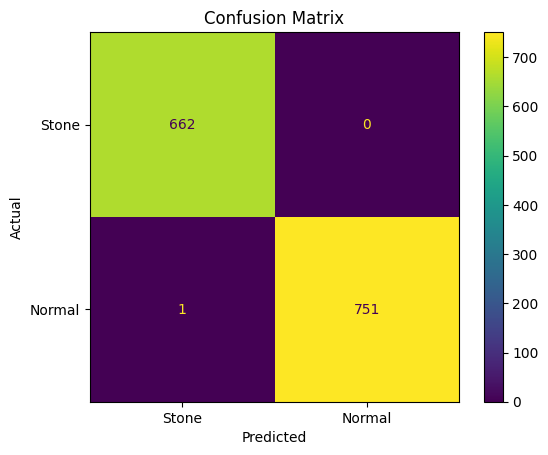

In [106]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_pred,y_true)

cmob = ConfusionMatrixDisplay(cm, display_labels=['Stone', 'Normal'])

cmob.plot()

cmob.ax_.set(title='Confusion Matrix',
            xlabel='Predicted',
            ylabel='Actual')

plt.show()

In [107]:
# === ROC Curve and AUC ===
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

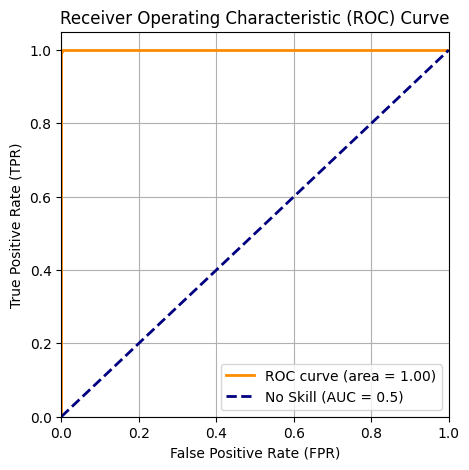

In [109]:
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='No Skill (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()